<a href="https://colab.research.google.com/github/byslavam/MAT422/blob/main/3_4_Logisitical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# **3.4 Logistical Regression**
Logistic regression is a model that in its basic form uses a logistic function
to model a binary dependent variable. It can be extended to several classes
of events such as classfication of images. In this section, we illustrate the use
of gradient descent on binary classification by logistic regression.

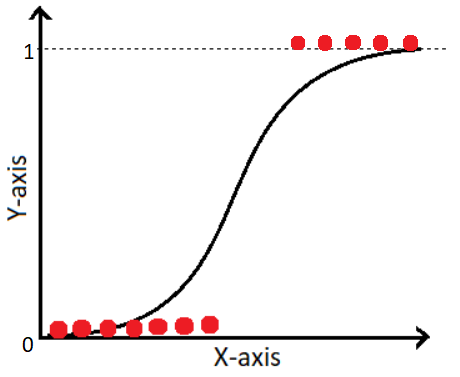

## **Logit Function**

The logit function is used to transform the probability of an event into a linear combination of the features. The logit function is defined as:

$logit(p) = log(\frac{p}{1-p}) = α^Tx$

where:


*   $p$ is the probability
*   $\alpha$ is the vector of parametes
*   $x$ is the vector of features

The regression model is defined as:

$p̂ = σ(α^Tx)$

where:

*   $p̂$ is the predicited probability
*   $σ$ is the sigmoid function


## **Sigmoaid Function**
The sigmoid function maps the real line to the interval $[0,1]$. It is defined as:

$σ(x) = \frac{1}{1+e^{-x}}$


## **Cross-Entropy Loss**
Taking a logarithm, multiplying by $−1/n$ and substituting the sigmoid function, we want to minimize the cross-entropy loss. The cross-entropy loss is defined as:

$L(α) = \frac{-1}{n} = Σ_{i=1}^{n}(y_i-p̂_i)x_i$


## **Gradient Descent**

The gradient descent algorithm is used to minimize the loss function.


## **Python Demo using Sckit-Learn**

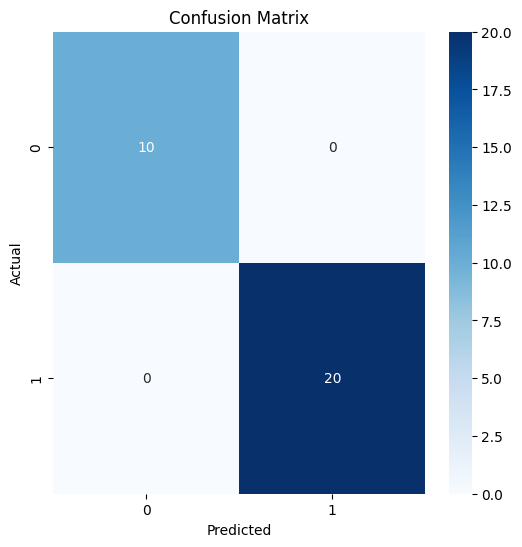

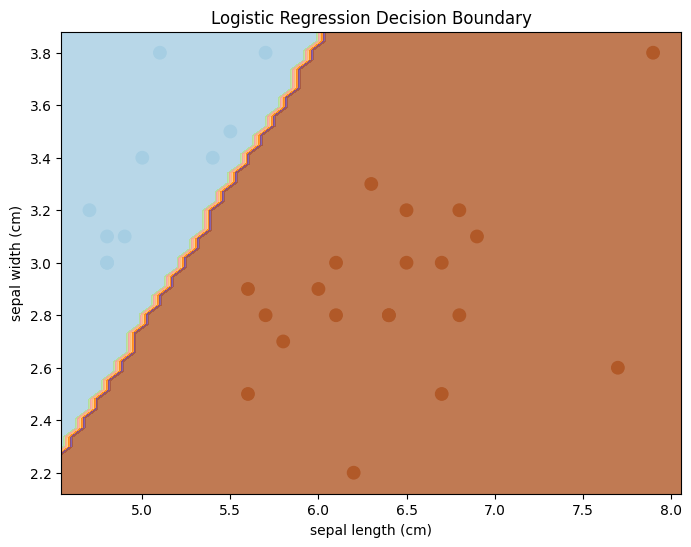

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the Iris dataset from scikit-learn
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = (iris.target != 0).astype(int)  # Convert to binary classification problem (setosa vs. non-setosa)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix and classification report
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, s=80)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Print the classification report
print(report)
